Counterintuitive problem: Everyone in a room keeps giving dollars to random others. 
------------

from http://www.decisionsciencenews.com/2017/06/19/counterintuitive-problem-everyone-room-keeps-giving-dollars-random-others-youll-never-guess-happens-next/
    
Second exploration.  See first version for a more basic explanation. 

July, 2017 - Roger Allen

In [1]:
#%matplotlib notebook (breaks on imshow)
%matplotlib inline
import matplotlib.pyplot as plt
from random import randint
import numpy as np

In [2]:
class DollarSim(object):
    def __init__(self, num_people, num_dollars, num_steps):
        self.num_people  = num_people
        self.num_dollars = num_dollars
        self.num_steps   = num_steps
        self.dollars        = np.zeros((self.num_steps,self.num_people),np.int32)
        self.dollars[0][:]  = self.num_dollars
        self.temp_dollars   = np.zeros(self.num_people,np.int32)
        self.sorted_dollars = np.zeros((self.num_steps,self.num_people),np.int32)

    def step(self,s):
        """one step in the simulation
        s gives the step number and should be one greater than the 
        previous step.  first s value should be 1
        
        everyone picks a random person to transfer their money to
        go through a temporary array to avoid modifying the initial
        state of the simulation step.  E.g if a person has $0 at the
        start of the step, they shouldn't transfer money in that step.
        But, without this temp array someone prior could transfer
        money & they would be able to further move that money.
        """
        for i in range(self.num_people):
            if self.dollars[s-1][i] > 0:
                j = randint(0,self.num_people-1) # randint is inclusive of top value
                while j == i: # you cannot give money to yourself
                    j = randint(0,self.num_people-1) 
                self.temp_dollars[j] += 1  # credit a dollar to them
                self.temp_dollars[i] -= 1  # debit a dollar from yourself
        # actually do the transfers
        self.dollars[s] = self.dollars[s-1] + self.temp_dollars
        self.temp_dollars[:] = 0
        # sort the dollars for later graphing
        self.sorted_dollars[s] = sorted(self.dollars[s])

    def simulate(self,s):
        """simulate s time steps"""
        for i in range(1,self.num_steps):
            self.step(i)
        
    def show_at_step(self,s):
        """show each person's number of dollars at step s"""
        fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=(16,6))
        ax1.plot(self.dollars[s])
        ax1.set_title("ordered by person")
        ax1.set_ylabel("$")
        ax2.plot(self.sorted_dollars[s])
        ax2.set_title("ordered by value")
        ax2.set_ylabel("$")
        ax1.set_xlabel("people")

    def show_all_steps(self):
        """show all people over all time"""
        fig, ax1 = plt.subplots(figsize=(16,8))
        cax1 = ax1.imshow(self.dollars.T, interpolation='nearest', aspect='auto')
        ax1.set_title("all steps")
        ax1.set_xlabel("time")
        ax1.set_ylabel("people")
        fig.colorbar(cax1)

    def show_all_steps_sorted(self):
        """show all people over all time"""
        fig, ax1 = plt.subplots(figsize=(16,8))
        cax1 = ax1.imshow(self.sorted_dollars.T, interpolation='nearest', aspect='auto')
        ax1.set_title("all steps sorted")
        ax1.set_xlabel("time")
        ax1.set_ylabel("people")
        fig.colorbar(cax1)

    def show_all_steps_for(self,p):
        """show how person p has fared"""
        fig, ax1 = plt.subplots(figsize=(16,6))
        ax1.plot(self.dollars.T[p])
        ax1.set_title("all steps for person "+str(p))
        ax1.set_xlabel("time")
        ax1.set_ylabel("$")


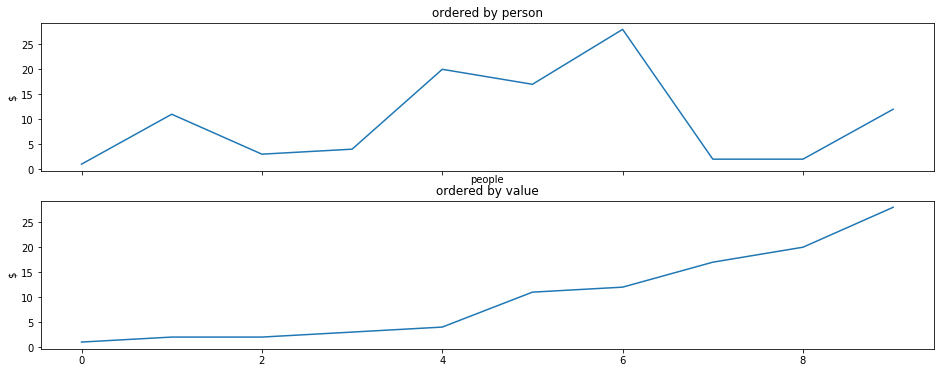

In [3]:
sim = DollarSim(10,10,1000)
sim.simulate(1000)
sim.show_at_step(999)

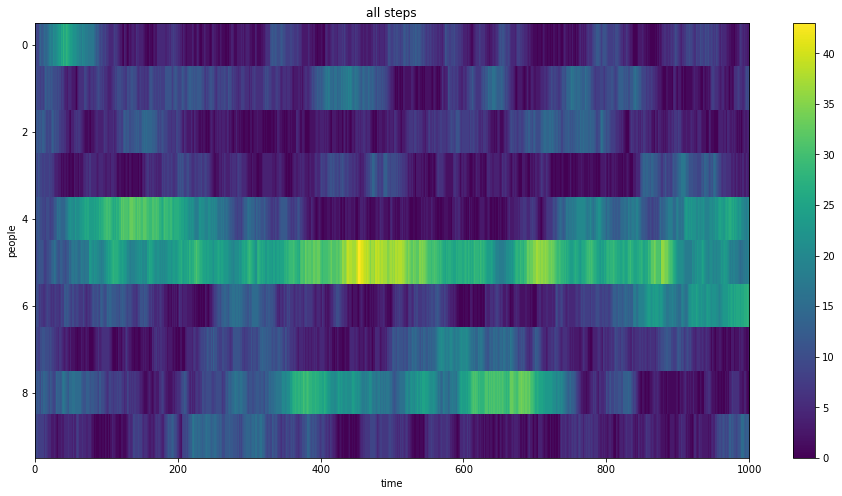

In [4]:
sim.show_all_steps()

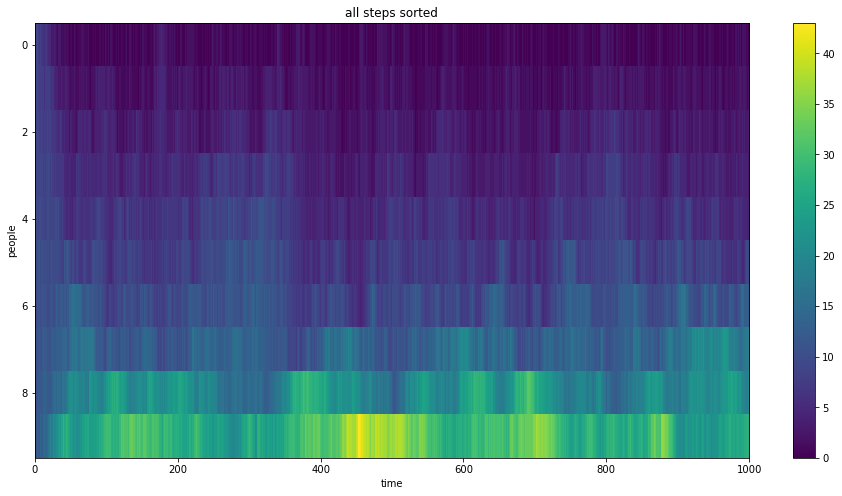

In [5]:
sim.show_all_steps_sorted()

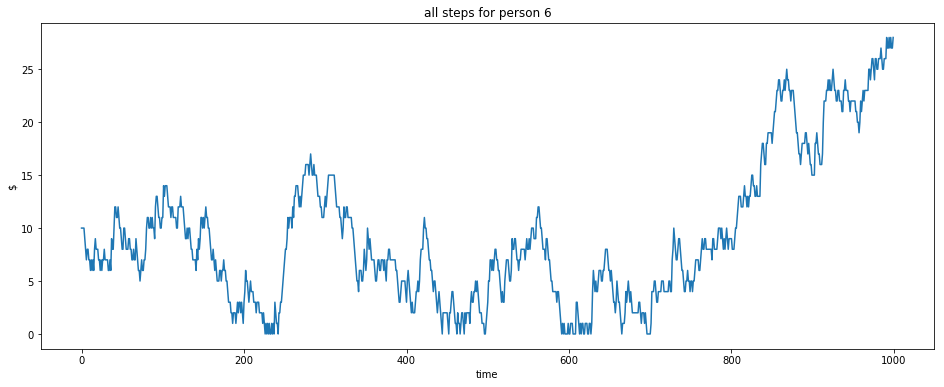

In [6]:
sim.show_all_steps_for(6)

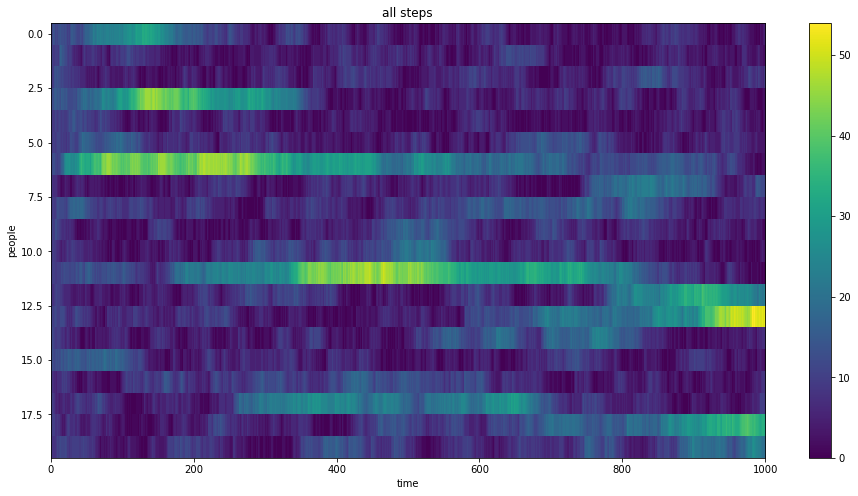

In [7]:
sim = DollarSim(20,10,1000)
sim.simulate(1000)
sim.show_all_steps()

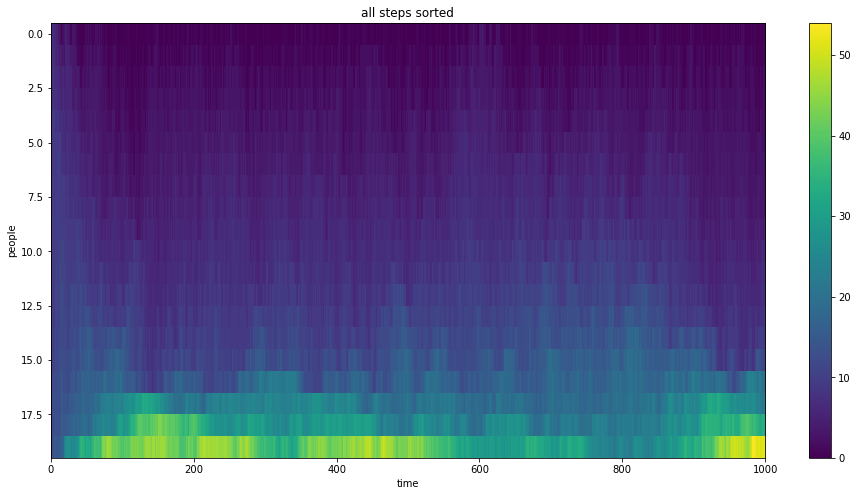

In [8]:
sim.show_all_steps_sorted()

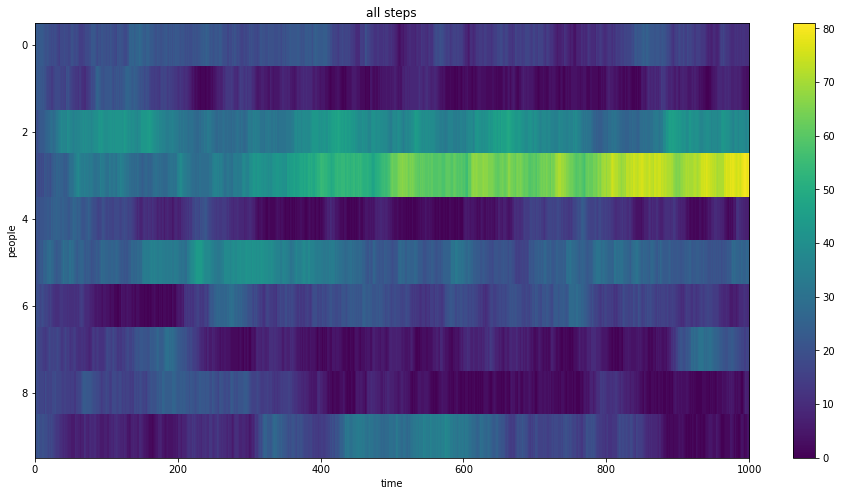

In [9]:
sim = DollarSim(10,20,1000)
sim.simulate(1000)
sim.show_all_steps()

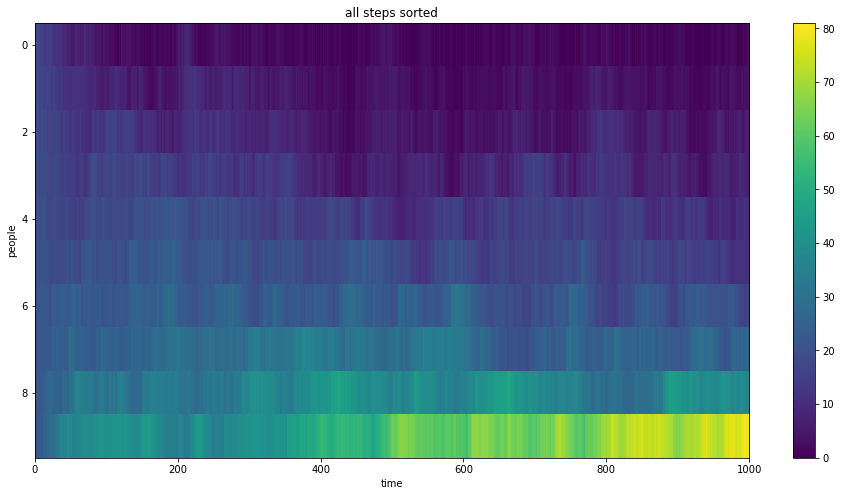

In [10]:
sim.show_all_steps_sorted()